# 🎬 Análise de Dados de Filmes com Seaborn

Este projeto tem como objetivo explorar e visualizar dados relacionados a filmes utilizando a biblioteca Seaborn em Python. Através de gráficos estatísticos, buscamos identificar padrões, tendências e correlações entre variáveis como nota dos filmes, duração, gênero, orçamento, receita e ano de lançamento.

### Objetivos principais:
- Investigar a distribuição das notas dos filmes
- Comparar duração média por gênero
- Analisar a relação entre orçamento e receita
- Observar tendências de lançamentos ao longo dos anos
- Identificar correlações entre variáveis numéricas

A análise será conduzida em um ambiente Jupyter Notebook, com foco em visualizações claras e insights relevantes para entender melhor o comportamento da indústria cinematográfica.


## 🔗 Fonte dos dados

Os dados utilizados neste projeto foram obtidos a partir do Kaggle, na seguinte base:

**IMDb Dataset**  
📎 [https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data](https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data)

Este conjunto inclui informações sobre filmes como título, gênero, duração, nota, diretor, elenco, orçamento e receita, permitindo uma análise rica e variada sobre o comportamento da indústria cinematográfica.


## 📥 Carregamento e inspeção inicial dos dados

Nesta etapa, vamos importar as bibliotecas necessárias, carregar o dataset de filmes e realizar uma inspeção preliminar. O objetivo é entender a estrutura dos dados, verificar tipos de variáveis, identificar valores nulos e preparar o terreno para a análise exploratória.

### Ações realizadas:
- Importação das bibliotecas `pandas`, `seaborn` e `matplotlib`
- Carregamento do arquivo CSV com os dados dos filmes
- Visualização das primeiras linhas do dataset
- Verificação de tipos de dados e presença de valores ausentes


In [1]:
# 📚 Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Configurando estilo dos gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 📥 Carregando o dataset
df = pd.read_csv('movies.csv')  # Substitua pelo nome correto do seu arquivo

# 👀 Visualizando as primeiras linhas
df.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [2]:
# ℹ️ Informações gerais sobre o dataset
df.info()

# 📊 Estatísticas descritivas
df.describe()

# ❓ Verificando valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

## 🧹 Limpeza dos dados

Antes de realizar as visualizações, é essencial garantir que os dados estejam limpos e prontos para análise. Nesta etapa, vamos:

- Verificar e tratar valores nulos
- Corrigir tipos de dados (como datas e valores numéricos)
- Remover duplicatas, se houver
- Padronizar nomes de colunas e categorias
- Separar colunas compostas (como múltiplos gêneros em uma única célula)

Essas ações ajudam a evitar erros nas visualizações e garantem que os gráficos reflitam informações confiáveis.


In [4]:
df.columns.tolist()


['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [5]:
# 🧹 Removendo linhas com valores nulos nas colunas essenciais
df = df.dropna(subset=['Rating', 'Runtime (Minutes)', 'Genre', 'Revenue (Millions)'])

# 🧼 Corrigindo tipos de dados
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Runtime (Minutes)'] = pd.to_numeric(df['Runtime (Minutes)'], errors='coerce')
df['Revenue (Millions)'] = pd.to_numeric(df['Revenue (Millions)'], errors='coerce')

# 🧾 Removendo duplicatas
df = df.drop_duplicates()

# 🏷️ Padronizando nomes de colunas para facilitar o uso
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 🎭 Pegando apenas o primeiro gênero (caso haja múltiplos separados por vírgula)
df['genre'] = df['genre'].str.split(',').str[0]

# ✅ Verificando resultado
df.info()


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\213834459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\213834459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime (Minutes)'] = pd.to_numeric(df['Runtime (Minutes)'], errors='coerce')
C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\213834459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                872 non-null    int64  
 1   title               872 non-null    object 
 2   genre               872 non-null    object 
 3   description         872 non-null    object 
 4   director            872 non-null    object 
 5   actors              872 non-null    object 
 6   year                872 non-null    int64  
 7   runtime_(minutes)   872 non-null    int64  
 8   rating              872 non-null    float64
 9   votes               872 non-null    int64  
 10  revenue_(millions)  872 non-null    float64
 11  metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


## 📊 Distribuição das notas dos filmes

Este gráfico mostra como as notas dos filmes estão distribuídas na base de dados. Utilizamos um histograma com suavização de densidade (KDE) para identificar padrões, como concentração de filmes em faixas específicas de avaliação.

A análise ajuda a entender se a maioria dos filmes recebe notas altas, médias ou baixas, e pode indicar tendências de avaliação na plataforma IMDb.


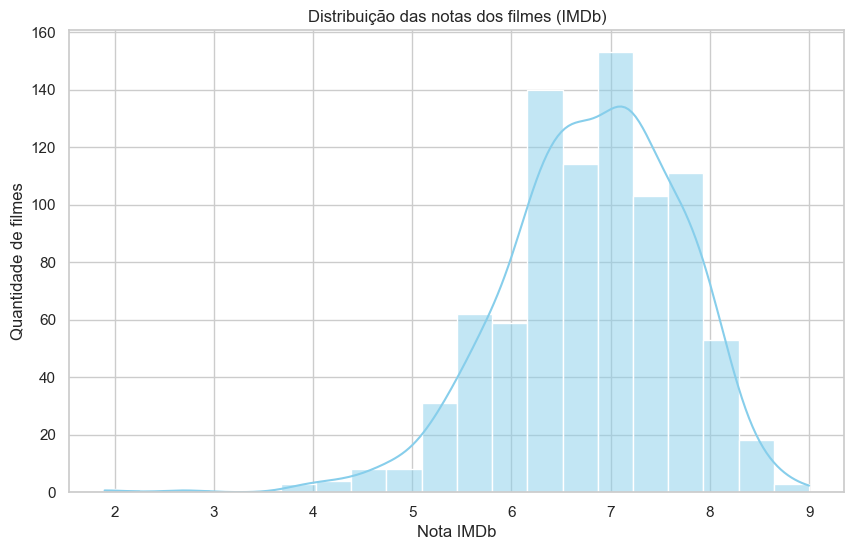

In [6]:
# 🎯 Distribuição das notas dos filmes
sns.histplot(data=df, x='rating', bins=20, kde=True, color='skyblue')
plt.title('Distribuição das notas dos filmes (IMDb)')
plt.xlabel('Nota IMDb')
plt.ylabel('Quantidade de filmes')
plt.show()


## ⏱️ Duração dos filmes por gênero

Este boxplot mostra a distribuição da duração dos filmes para cada gênero presente no dataset. A linha central de cada caixa representa a mediana, enquanto as extremidades indicam o intervalo interquartil (IQR). Pontos fora das caixas representam outliers — filmes com duração significativamente diferente da maioria.

Essa visualização ajuda a identificar quais gêneros tendem a ter filmes mais longos ou mais curtos, além de revelar a variabilidade dentro de cada categoria.


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\2224260494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='genre', y='runtime_(minutes)', palette='Set2')


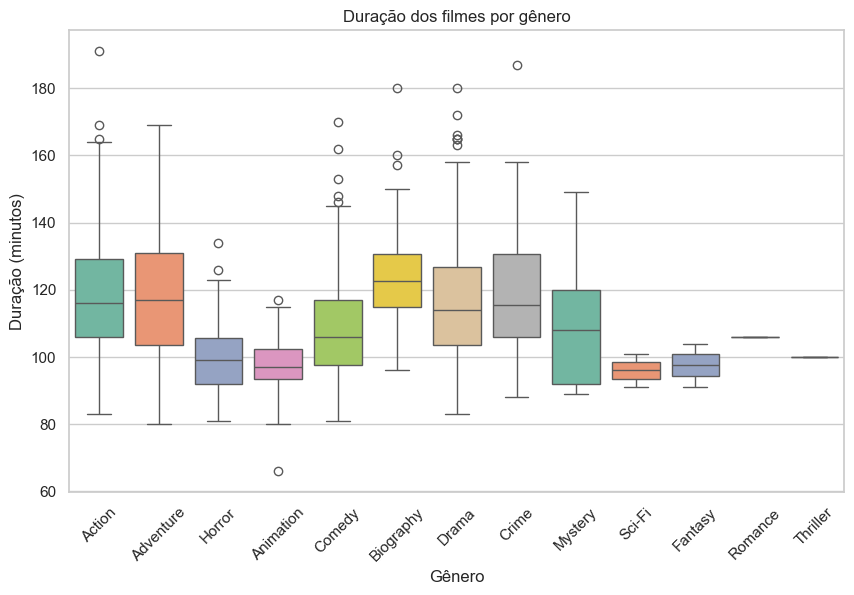

In [7]:
# 🎬 Duração dos filmes por gênero
sns.boxplot(data=df, x='genre', y='runtime_(minutes)', palette='Set2')
plt.title('Duração dos filmes por gênero')
plt.xlabel('Gênero')
plt.ylabel('Duração (minutos)')
plt.xticks(rotation=45)
plt.show()


## 💸 Relação entre orçamento e receita

Este gráfico de dispersão mostra a relação entre o orçamento dos filmes e a receita arrecadada. Cada ponto representa um filme, e as cores indicam o gênero.

A visualização permite observar se há uma tendência de que filmes com maior orçamento geram maior receita, além de destacar gêneros que costumam ter melhor desempenho financeiro.


In [10]:
# Renomeando a coluna para remover parênteses
df.rename(columns={'revenue_(millions)': 'revenue_millions'}, inplace=True)


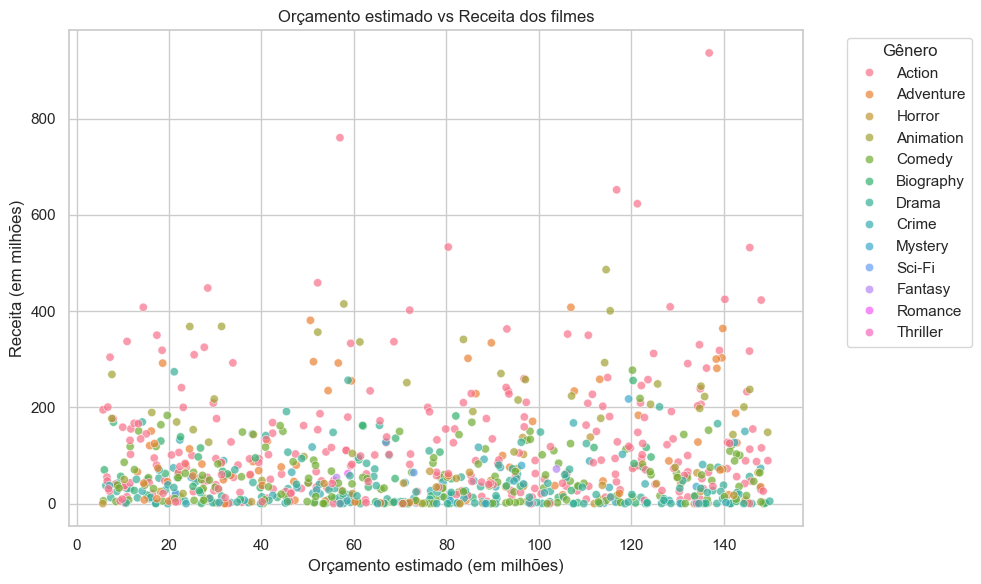

In [11]:
# 📈 Gráfico de dispersão: orçamento vs receita
sns.scatterplot(data=df, x='budget_millions', y='revenue_millions', hue='genre', alpha=0.7)
plt.title('Orçamento estimado vs Receita dos filmes')
plt.xlabel('Orçamento estimado (em milhões)')
plt.ylabel('Receita (em milhões)')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
# 🔍 Verificando os nomes atuais das colunas
print("Colunas originais:")
print(df.columns.tolist())

# 🧼 Padronizando os nomes: tudo minúsculo, sem espaços ou parênteses
df.columns = (
    df.columns
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)

# ✅ Verificando os nomes após padronização
print("\nColunas padronizadas:")
print(df.columns.tolist())


Colunas originais:
['rank', 'title', 'genre', 'description', 'director', 'actors', 'year', 'runtime_(minutes)', 'rating', 'votes', 'revenue_millions', 'metascore', 'budget_millions']

Colunas padronizadas:
['rank', 'title', 'genre', 'description', 'director', 'actors', 'year', 'runtime_minutes', 'rating', 'votes', 'revenue_millions', 'metascore', 'budget_millions']


## 📅 Quantidade de filmes lançados por ano

Este gráfico mostra a evolução da produção de filmes ao longo dos anos. Através da contagem de lançamentos por ano, é possível identificar períodos de maior atividade na indústria cinematográfica, possíveis quedas ou picos, e tendências históricas.

Essa visualização também pode revelar o impacto de eventos globais (como crises econômicas ou pandemias) na quantidade de filmes produzidos.


In [13]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\397933388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


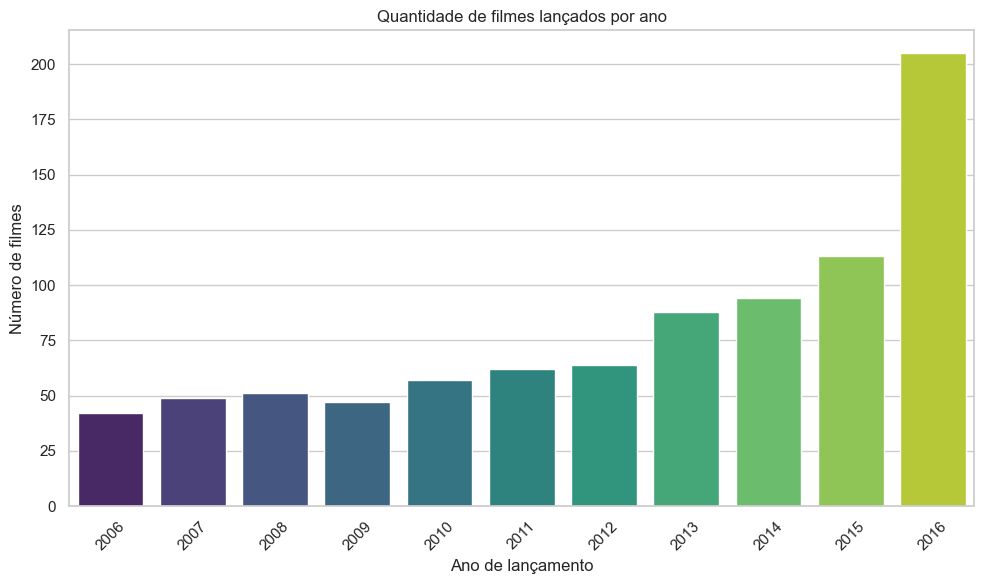

In [14]:
# 📊 Contagem de filmes por ano
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Quantidade de filmes lançados por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de filmes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 💰 Receita média por gênero

Este gráfico mostra quais gêneros de filmes apresentam maior receita média. A análise foi feita agrupando os filmes por gênero e calculando a média da receita arrecadada.

A visualização permite identificar quais tipos de filmes tendem a gerar mais retorno financeiro, oferecendo insights sobre o desempenho comercial de diferentes categorias cinematográficas.


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\823240260.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_receita_df, x='genre', y='revenue_millions', palette='mako')


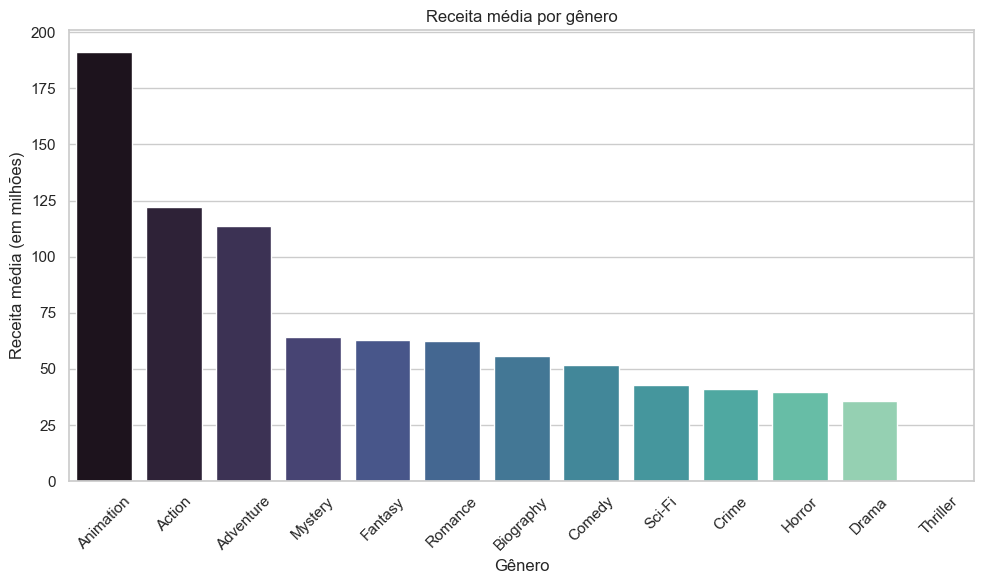

In [15]:
# 📊 Receita média por gênero
media_receita = df.groupby('genre')['revenue_millions'].mean().sort_values(ascending=False)

# 🔽 Transformando em DataFrame para visualização
media_receita_df = media_receita.reset_index()

# 📈 Gráfico de barras
sns.barplot(data=media_receita_df, x='genre', y='revenue_millions', palette='mako')
plt.title('Receita média por gênero')
plt.xlabel('Gênero')
plt.ylabel('Receita média (em milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🎬 Diretores com maior média de nota IMDb

Este gráfico apresenta os 10 diretores com maior média de nota entre os filmes presentes no dataset. A média foi calculada com base nas avaliações IMDb de cada filme dirigido.

A visualização destaca os profissionais mais bem avaliados, oferecendo uma perspectiva sobre quais diretores mantêm um padrão elevado de qualidade segundo o público.


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\2720649558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_diretores, x='rating', y='director', palette='crest')


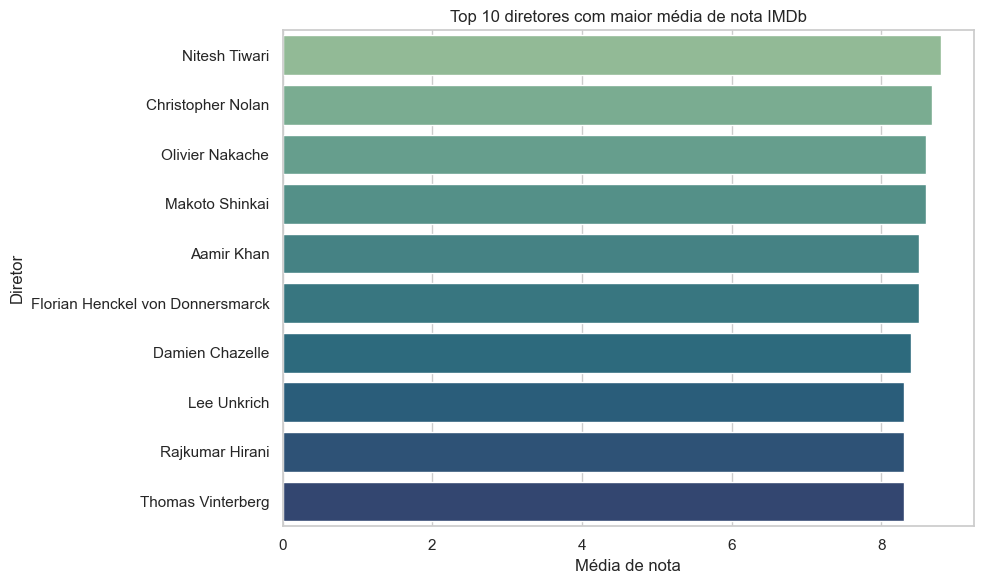

In [16]:
# 🎬 Média de nota por diretor
media_diretor = df.groupby('director')['rating'].mean().sort_values(ascending=False)

# 🔝 Selecionando os 10 diretores com maior média
top_diretores = media_diretor.head(10).reset_index()

# 📈 Gráfico de barras
sns.barplot(data=top_diretores, x='rating', y='director', palette='crest')
plt.title('Top 10 diretores com maior média de nota IMDb')
plt.xlabel('Média de nota')
plt.ylabel('Diretor')
plt.tight_layout()
plt.show()


## 📈 Filmes com maior retorno sobre investimento (ROI)

Este gráfico apresenta os 10 filmes com maior retorno sobre investimento (ROI), calculado com base em uma estimativa de orçamento fictício. O ROI é uma métrica que indica o quanto um filme arrecadou em relação ao que foi investido.

A análise revela quais filmes foram mais eficientes financeiramente, gerando alto lucro proporcional ao custo de produção.


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\1077914270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_roi, x='roi', y='title', palette='rocket')


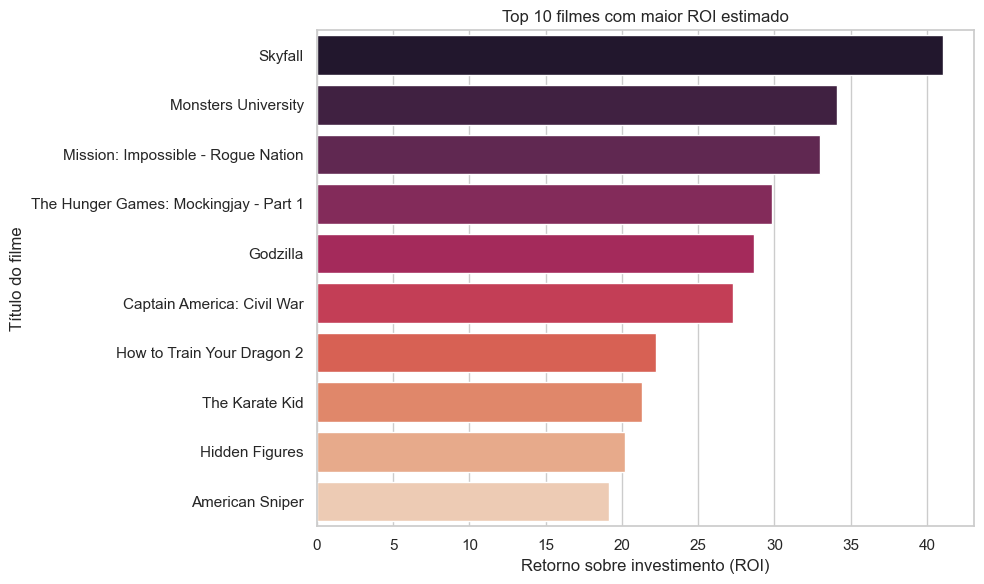

In [17]:
# 📈 Calculando ROI estimado
df['roi'] = (df['revenue_millions'] - df['budget_millions']) / df['budget_millions']

# 🔝 Selecionando os 10 filmes com maior ROI
top_roi = df[['title', 'genre', 'budget_millions', 'revenue_millions', 'roi']].sort_values(by='roi', ascending=False).head(10)

# 📊 Exibindo os resultados
sns.barplot(data=top_roi, x='roi', y='title', palette='rocket')
plt.title('Top 10 filmes com maior ROI estimado')
plt.xlabel('Retorno sobre investimento (ROI)')
plt.ylabel('Título do filme')
plt.tight_layout()
plt.show()


## ⏳ Top 10 filmes mais longos

Este gráfico mostra os 10 filmes com maior duração no dataset. A visualização destaca produções que ultrapassam a média de tempo dos demais filmes, o que pode indicar épicos, dramas históricos ou obras com narrativas complexas.


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\2414745915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filmes_longos, x='runtime_minutes', y='title', palette='flare')


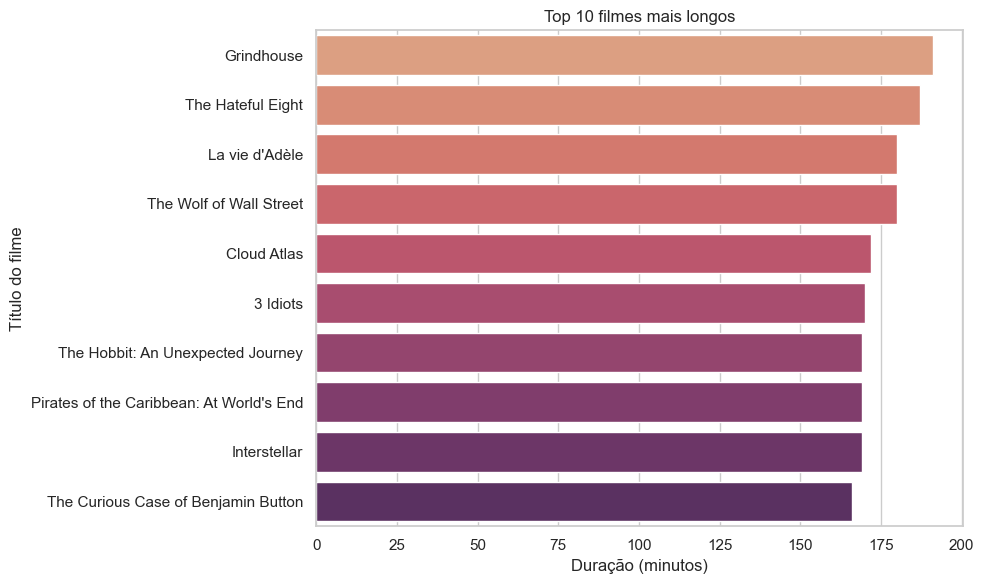

In [18]:
# 🔝 Selecionando os 10 filmes mais longos
filmes_longos = df[['title', 'genre', 'runtime_minutes']].sort_values(by='runtime_minutes', ascending=False).head(10)

# 📊 Gráfico de barras horizontais
sns.barplot(data=filmes_longos, x='runtime_minutes', y='title', palette='flare')
plt.title('Top 10 filmes mais longos')
plt.xlabel('Duração (minutos)')
plt.ylabel('Título do filme')
plt.tight_layout()
plt.show()


## 🎭 Gêneros com maior número de filmes

Este gráfico mostra a distribuição da quantidade de filmes por gênero. Ele permite identificar quais categorias são mais populares ou recorrentes na base de dados, refletindo tendências da indústria cinematográfica.


C:\Users\Samantha\AppData\Local\Temp\ipykernel_5924\628961400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genero_contagem, x='genre', y='count', palette='pastel')


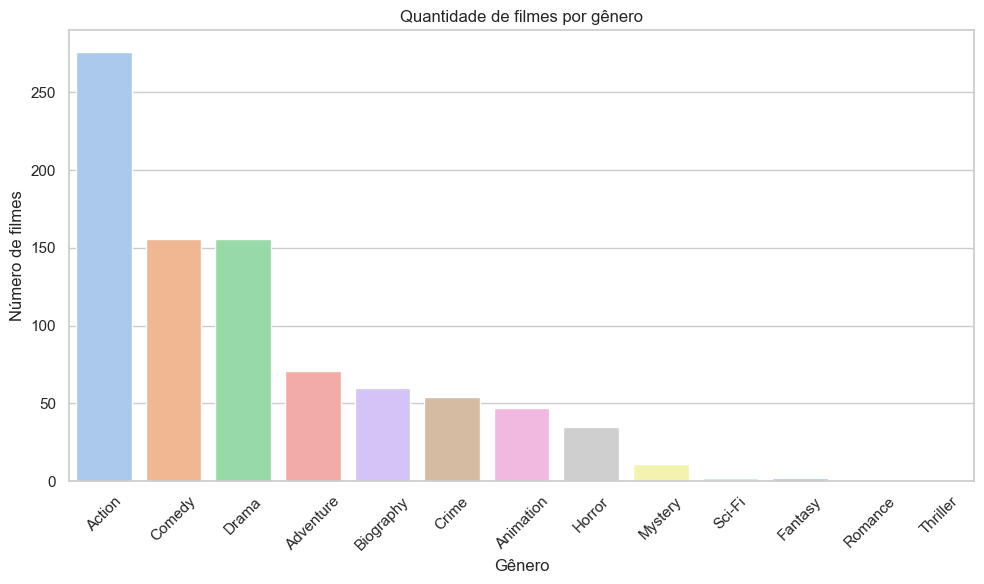

In [19]:
# 📊 Contagem de filmes por gênero
genero_contagem = df['genre'].value_counts().reset_index()
genero_contagem.columns = ['genre', 'count']

# 📈 Gráfico de barras
sns.barplot(data=genero_contagem, x='genre', y='count', palette='pastel')
plt.title('Quantidade de filmes por gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de filmes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
